In [1]:
# Import the libraries! pip install catboost
! pip install catboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('max_column', 1000)

     |████████████████████████████████| 69.2 MB 4.4 kB/s 


In [2]:

!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
train = pd.read_csv('/content/drive/MyDrive/Crypto/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Crypto/Test.csv')
sample = pd.read_csv('/content/drive/MyDrive/Crypto/SampleSubmission.csv')


In [106]:
train.shape, test.shape, sample.shape

((12632, 49), (6222, 48), (6222, 2))

In [107]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [108]:
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [109]:
train.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

In [110]:
train_len = len(train)
data=pd.concat([train,test])

In [111]:
train.drop(columns=['medium', 'youtube','id'], inplace=True)
test.drop(columns=['medium', 'youtube','id' ], inplace=True)

In [112]:
data.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [113]:
#data['high/market_cap'] = data['market_cap'] // data['high']

In [114]:
#data['market/low'] = data['market_cap'] // data['low']

In [115]:
#data['open/high'] = data['open'] // data['high']

In [116]:
#data['open/high'] = data['open'] // data['high']

In [117]:
data['variance'] = data['high'] - data['low']

In [118]:
data ['open + variance']= data['open'] + data['variance']

In [119]:
data['open+market_cap'] = data['open'] + data['market_cap']

In [120]:
data['open_Avg'] = data['open+market_cap']//data['low'].max()

In [121]:
data['open_max'] = data['open+market_cap']//data['high'].max()

In [122]:
data['open+low'] = data['open'] + data['low']

In [123]:
data['high+low'] = data['high'] + data['low']

In [124]:
data['open+high'] = data['open'] + data['high']

In [125]:
#data['open*high'] = data['open'] *  data['high'] 

In [126]:
#data['open*low'] = data['open'] *  data['low'] 

In [127]:
#data['open*high'] = data['open'] *  data['high'] * data['low']

In [128]:
data['open+market_cap'] = data['open'] + data['market_cap']

In [129]:
data['open'+'market_cap_global'] = data['open'] + data['market_cap_global']

In [130]:
data['open_Avg'] = data['open']//(data['open'].max())

In [131]:
data['high + Market Cap'] = data['high'] + data['market_cap']

In [132]:
data['high'+'market_cap_global'] = data['high'] + data['market_cap_global']

In [133]:
data['high + market_cap_rank'] = data['high'] + data['market_cap_rank']

In [134]:
data['high + market_cap_rank'] = data['high'] + data['market_cap_rank']

In [135]:
data.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close', 'variance',
       'open + varian

In [136]:
Score_data = pd.concat(([data['high'],data['low'],data['open'],data['market_cap_rank'],data['market_cap_global'],data['market_cap_rank'],data['market_cap']]), axis=1)

In [137]:
Score_data.head()

,high,low,open,market_cap_rank,market_cap_global,market_cap_rank,market_cap
0,9428.490628,9422.849081,9422.849081,1.0,2.818066e+11,1.0,1.737635e+11
1,7992.059917,7967.567267,7985.359278,1.0,2.126897e+11,1.0,1.426942e+11
2,49394.593518,49068.057046,49202.033778,1.0,1.530712e+12,1.0,9.166977e+11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10535.737119,10384.798216,10535.737119,1.0,3.386925e+11,1.0,1.921183e+11


In [138]:
Score_data=Score_data.fillna(0)

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalised_data = scaler.fit_transform(Score_data)

In [140]:
normalised_data

array([[-0.08259   , -0.07842703, -0.08077438, ..., -0.05102543,
         0.70877726, -0.05062027],
       [-0.18751206, -0.18586214, -0.18632646, ..., -0.21167759,
         0.70877726, -0.17334568],
       [ 2.83667777,  2.84835154,  2.84013402, ...,  2.85187454,
         0.70877726,  2.8840145 ],
       ...,
       [-0.77128083, -0.77406199, -0.77267591, ..., -0.70604414,
        -1.39302935, -0.73699637],
       [-0.77128083, -0.77406199, -0.77267591, ..., -0.70604414,
        -1.39302935, -0.73699637],
       [-0.25420718, -0.2534287 , -0.25440797, ..., -0.2582438 ,
         0.70877726, -0.23316334]])

In [141]:
from sklearn.cluster import KMeans


km=KMeans(5,random_state=2019)
#data["Score_cluster"]=km.fit_predict(normalised_data)


In [142]:
data.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close,variance,open + variance,open+market_cap,open_Avg,open_max,open+low,high+low,open+high,openmarket_cap_global,high + Market Cap,highmarket_cap_global,high + market_cap_rank
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323,5.641547,9428.490628,1.737635e+11,0.0,2822265.0,18845.698162,18851.339709,18851.339709,2.818066e+11,1.737635e+11,2.818066e+11,9429.490628
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267,24.492650,8009.851928,1.426942e+11,0.0,2317638.0,15952.926545,15959.627184,15977.419195,2.126897e+11,1.426942e+11,2.126897e+11,7993.059917
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484,326.536472,49528.570250,9.166977e+11,0.0,14888998.0,98270.090824,98462.650564,98596.627296,1.530712e+12,9.166977e+11,1.530712e+12,49395.593518
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216,150.938903,10686.676022,1.921183e+11,0.0,3120384.0,20920.535335,20920.535335,21071.474238,3.386925e+11,1.921183e+11,3.386925e+11,10536.737119


In [143]:
(train["close"].isna().sum()/ (len(train)))  * 100

31.784357188093733

In [144]:
data.drop(columns=['medium', 'youtube','id'], inplace=True)

In [145]:
#data=data.fillna(-99999)

In [146]:
data=data.round(2)

In [147]:
train =data[:len(train)]

In [148]:
test = data[len(train):]

In [149]:
train.shape

(12632, 58)

In [150]:
test.shape

(6222, 58)

In [151]:
train_1 = train[~train['close'].isnull()]

In [152]:
train_1=train_1.fillna(0)

In [153]:
test_1 = train[train['close'].isnull()]

In [154]:
test_1=test_1.fillna(0)

In [155]:
X = train_1.drop(columns=['close'])
y = train_1['close']

In [156]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [157]:
 #Instantiate model
lm2 = LinearRegression()
 #Fit Model
lm2.fit(X_train, y_train)
 #Predict
y_pred = lm2.predict(X_test)

In [158]:
# to calculate these metrics;
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 30.2302906720268
MSE: 3015.4320465640158
RMSE: 54.912949716474124


In [159]:
test_1=test_1.drop(columns= 'close')

In [160]:
test_1['close'] = lm2.predict(test_1)

In [161]:
train = pd.concat([train_1,test_1])

In [162]:
train['close'][train['open']==0] =0

In [163]:
#train['Score_cluster'][train['open']==0] =0

In [164]:
#train=train[train['open'] != 0]

In [165]:
train.head()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close,variance,open + variance,open+market_cap,open_Avg,open_max,open+low,high+low,open+high,openmarket_cap_global,high + Market Cap,highmarket_cap_global,high + market_cap_rank
0,1,9422.85,9428.49,9422.85,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.01,1.0,606.0,2.0,1.0,1.0,4422,1.43,2.818066e+11,9428.28,5.64,9428.49,1.737635e+11,0.0,2822265.0,18845.70,18851.34,18851.34,2.818066e+11,1.737635e+11,2.818066e+11,9429.49
1,1,7985.36,7992.06,7967.57,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.01,1.0,0.0,0.0,0.0,0.0,2159,-2.46,2.126897e+11,7967.57,24.49,8009.85,1.426942e+11,0.0,2317638.0,15952.93,15959.63,15977.42,2.126897e+11,1.426942e+11,2.126897e+11,7993.06
2,1,49202.03,49394.59,49068.06,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.01,1.0,692.0,3.0,1.0,1.0,10602,4.94,1.530712e+12,49120.74,326.54,49528.57,9.166977e+11,0.0,14888998.0,98270.09,98462.65,98596.63,1.530712e+12,9.166977e+11,1.530712e+12,49395.59
4,1,10535.74,10535.74,10384.80,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.01,1.0,749.0,2.0,1.0,1.0,3996,2.61,3.386925e+11,10384.80,150.94,10686.68,1.921183e+11,0.0,3120384.0,20920.54,20920.54,21071.47,3.386925e+11,1.921183e+11,3.386925e+11,10536.74
6,1,9697.25,9712.25,9697.25,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,138.0,53.0,345.0,3890.0,401.0,30469074.0,98.0,1398.0,678.0,4066.0,102.0,181.0,861.0,2490.0,256.0,281173.0,1208072.0,2631596.0,25743321.0,611152.0,30476752.0,3.7,43.0,3.5,3.0,3.1,66.5,0.01,1.0,656.0,2.0,1.0,1.0,4713,1.16,2.807819e+11,9712.25,15.00,9712.25,1.767035e+11,0.0,2870016.0,19394.50,19409.50,19409.50,2.807819e+11,1.767035e+11,2.807819e+11,9713.25


In [166]:
train =train.fillna(0)

test = test.fillna(0)

In [167]:
train=train.sort_index()

In [168]:
X = train.drop(columns=['close'])
y = train['close']

In [169]:
train.head()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close,variance,open + variance,open+market_cap,open_Avg,open_max,open+low,high+low,open+high,openmarket_cap_global,high + Market Cap,highmarket_cap_global,high + market_cap_rank
0,1,9422.85,9428.49,9422.85,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.01,1.0,606.0,2.0,1.0,1.0,4422,1.43,2.818066e+11,9428.28,5.64,9428.49,1.737635e+11,0.0,2822265.0,18845.70,18851.34,18851.34,2.818066e+11,1.737635e+11,2.818066e+11,9429.49
1,1,7985.36,7992.06,7967.57,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.01,1.0,0.0,0.0,0.0,0.0,2159,-2.46,2.126897e+11,7967.57,24.49,8009.85,1.426942e+11,0.0,2317638.0,15952.93,15959.63,15977.42,2.126897e+11,1.426942e+11,2.126897e+11,7993.06
2,1,49202.03,49394.59,49068.06,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.01,1.0,692.0,3.0,1.0,1.0,10602,4.94,1.530712e+12,49120.74,326.54,49528.57,9.166977e+11,0.0,14888998.0,98270.09,98462.65,98596.63,1.530712e+12,9.166977e+11,1.530712e+12,49395.59
3,1,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.0,0.0,17.0,424.0,268.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,285,0.00,0.000000e+00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
4,1,10535.74,10535.74,10384.80,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.01,1.0,749.0,2.0,1.0,1.0,3996,2.61,3.386925e+11,10384.80,150.94,10686.68,1.921183e+11,0.0,3120384.0,20920.54,20920.54,21071.47,3.386925e+11,1.921183e+11,3.386925e+11,10536.74


In [170]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]; categorical_features_indices

array([ 0, 42])

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [172]:
# Instantiate model
lm2 = CatBoostRegressor()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

Learning rate set to 0.057529
0:	learn: 12961.4234196	total: 17.5ms	remaining: 17.5s
1:	learn: 12254.1336018	total: 32.4ms	remaining: 16.2s
2:	learn: 11576.5542061	total: 47.3ms	remaining: 15.7s
3:	learn: 10949.1098192	total: 68.8ms	remaining: 17.1s
4:	learn: 10336.1757361	total: 83.5ms	remaining: 16.6s
5:	learn: 9762.0953092	total: 98.2ms	remaining: 16.3s
6:	learn: 9226.5387863	total: 113ms	remaining: 16s
7:	learn: 8727.0197871	total: 128ms	remaining: 15.9s
8:	learn: 8242.9357751	total: 142ms	remaining: 15.7s
9:	learn: 7785.2360965	total: 157ms	remaining: 15.5s
10:	learn: 7355.2279799	total: 185ms	remaining: 16.7s
11:	learn: 6946.3488408	total: 205ms	remaining: 16.9s
12:	learn: 6572.9136608	total: 220ms	remaining: 16.7s
13:	learn: 6209.6600029	total: 235ms	remaining: 16.6s
14:	learn: 5867.8845122	total: 250ms	remaining: 16.4s
15:	learn: 5549.4933610	total: 264ms	remaining: 16.2s
16:	learn: 5245.1563970	total: 278ms	remaining: 16.1s
17:	learn: 4954.7695776	total: 293ms	remaining: 16s
1

In [173]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

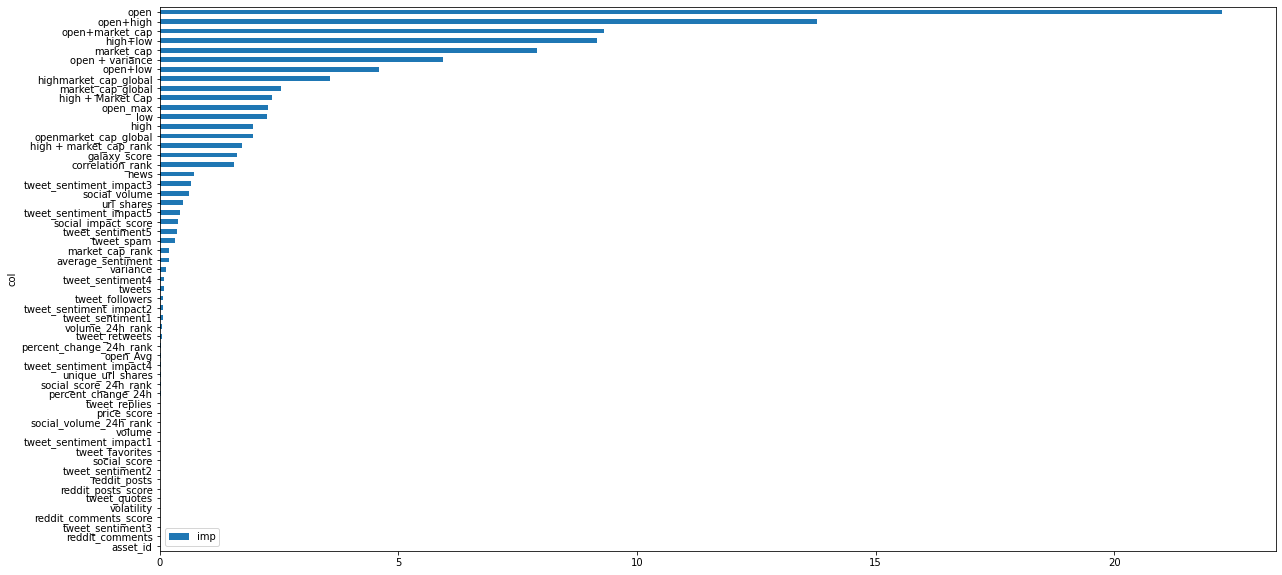

In [174]:
## Check for the feature importance 
fea_imp = pd.DataFrame({'imp':lm2.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-60:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [175]:
fi_df = pd.DataFrame(index=X.columns, data=lm2.feature_importances_)

fi_df = fi_df.reset_index()
fi_df.columns = ['cols','imp']

In [176]:
fi_df.sort_values(by = ['imp'],ascending=False,inplace=True)

In [177]:
fi_df.head(20)

,cols,imp
1,open,22.262517
52,open+high,13.776751
47,open+market_cap,9.301383
51,high+low,9.155292
5,market_cap,7.896243
46,open + variance,5.943117
50,open+low,4.606394
55,highmarket_cap_global,3.561756
44,market_cap_global,2.535460
54,high + Market Cap,2.346752


In [178]:
semi_useless = fi_df[fi_df['imp'] < 1]['cols'].to_list()

In [179]:
len(semi_useless)

40

In [180]:
train = train.drop(semi_useless,axis=1)
test = test.drop(semi_useless,axis=1)

In [181]:
X = train.drop(columns=['close'])
y = train['close']

In [182]:
test=test.drop(columns=['close'])

In [183]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from xgboost import XGBRegressor

testsplit_store=[]
test_store=[]
fold=KFold(n_splits=15, random_state=12345, shuffle=True    )
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb =XGBRegressor(objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        #tree_method = 'gpu_hist',
        max_depth = 10,
        gamma=10,
        alpha=7,
        min_child_weight = 1,
        n_estimators = 1000,
        n_gpus= 1,

        subsample = 0.7)
    xgb.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=0)
    predict = xgb.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,predict)))
    testsplit_store.append(np.sqrt(mean_squared_error(y_test,predict)))
    pred = xgb.predict(test)
    test_store.append(pred)

err:  48.36212680701888
err:  58.59718652570549
err:  52.13836743814637
err:  57.46947242368515
err:  48.49779401199151
err:  49.80364317061426
err:  50.27259310058435
err:  62.84074397968308
err:  47.39716253873673
err:  58.25446426841553
err:  89.03525747335705
err:  58.91891943835152
err:  77.68984531481301
err:  48.64037902426205
err:  49.51150265010841


In [184]:
np.mean(testsplit_store)

57.161963877698234

In [185]:
submit_prep = {"id": sample['id'], 'close': np.mean(test_store, 0)}
submission = pd.DataFrame(data = submit_prep )

In [186]:
submission.to_csv('sijithe_solutiom.csv', index=False)

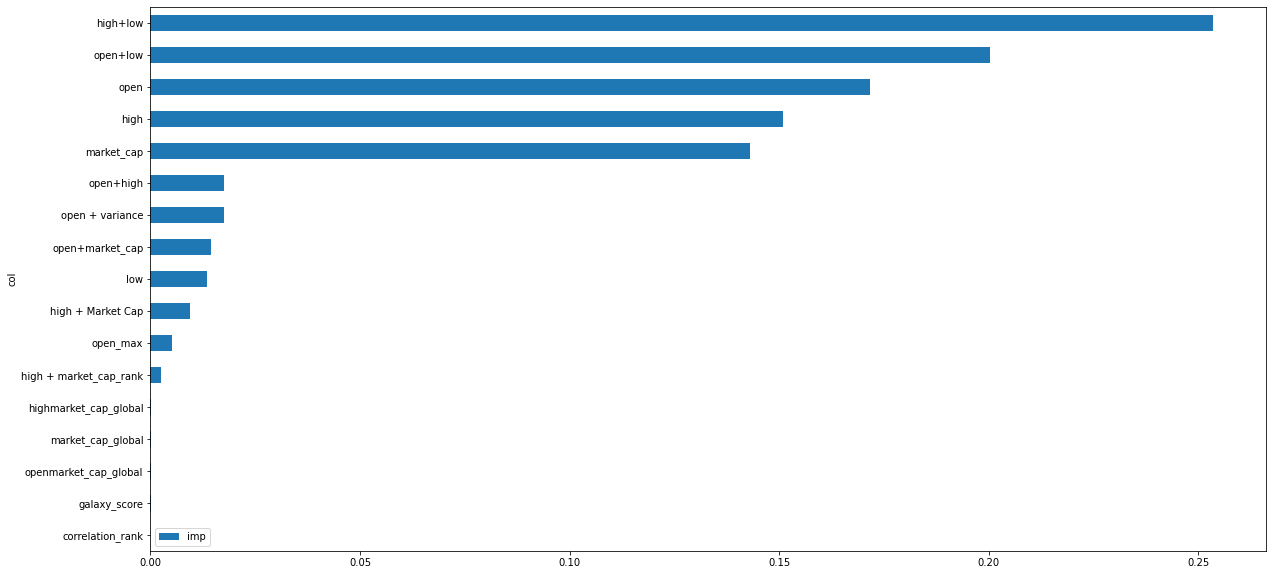

In [187]:
## Check for the feature importance 
fea_imp = pd.DataFrame({'imp':xgb.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-60:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [188]:
fi_df = pd.DataFrame(index=X.columns, data=xgb.feature_importances_)

fi_df = fi_df.reset_index()
fi_df.columns = ['cols','imp']

In [189]:
fi_df.sort_values(by = ['imp'],ascending=False,inplace=True)

In [190]:
fi_df.tail(20)

,cols,imp
11,high+low,0.253508
10,open+low,0.200171
0,open,0.171708
1,high,0.150786
3,market_cap,0.143074
12,open+high,0.017643
7,open + variance,0.017553
8,open+market_cap,0.014411
2,low,0.013549
14,high + Market Cap,0.009345


In [191]:
np.mean(testsplit_store)

57.161963877698234

In [192]:
semi_useless = fi_df[fi_df['imp'] < 0.0002]['cols'].to_list()

In [193]:
len(semi_useless)

5

In [194]:
train = train.drop(semi_useless,axis=1)
test = test.drop(semi_useless,axis=1)

In [195]:
X = train.drop(columns=['close'])
y = train['close']

In [196]:
#test=test.drop(columns=['close'])

In [ ]:
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from xgboost import XGBRegressor

testsplit_store=[]
test_store=[]
fold=KFold(n_splits=15, random_state=12345, shuffle=True    )
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb =XGBRegressor(objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.00999,
        max_depth = 30,
        min_child_weight = 1,
        n_estimators = 1000,
        gamma=20,
        alpha=20,
        scale_pos_weight =100,
        n_gpus= 1,
        eta = 0.20,
        #reg_alpha = 100,
        #reg_lambda= 100,
        subsample = 0.8)
    xgb.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=0)
    predict = xgb.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,predict)))
    testsplit_store.append(np.sqrt(mean_squared_error(y_test,predict)))
    pred = xgb.predict(test)
    test_store.append(pred)

err:  50.80848854375737


In [ ]:
np.mean(testsplit_store)

In [ ]:
submit_prep = {"id": sample['id'], 'close': np.mean(test_store, 0)}
submission = pd.DataFrame(data = submit_prep )

In [ ]:
submission.to_csv('submitthe_solutiom.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_



In [ ]:

#hyperParameterTuning(X_train, y_train)

In [ ]:
!nvidia-smi